In [1490]:
#Langkah 1

In [1491]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1492]:
df = pd.read_csv('Census+2011.csv')
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [1493]:
df['State_name'].value_counts()

,count
State_name,
UTTAR PRADESH,71
MADHYA PRADESH,50
BIHAR,38
MAHARASHTRA,35
RAJASTHAN,33
TAMIL NADU,32
ORISSA,30
KARNATAKA,30
ASSAM,27


In [1494]:
# Langkah 2

In [1495]:
df.isnull().sum()

,0
District_code,0
State_name,0
District_name,0
Population,0
Male,0
Female,0
Literate,0
Workers,0
Male_Workers,0
Female_Workers,0


In [1496]:
import warnings
warnings.filterwarnings('ignore')

In [1497]:
filter1 = (df['Cultivator_Workers']==0) & (df['Agricultural_Workers']==0) & (df['Household_Workers']==0)
filter1.value_counts()

,count
False,640


In [1498]:
data = df[~filter1]
data[(df['Cultivator_Workers']==0) & (df['Agricultural_Workers']==0) & (df['Household_Workers']==0)]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50


In [1499]:
data.isnull().sum()

,0
District_code,0
State_name,0
District_name,0
Population,0
Male,0
Female,0
Literate,0
Workers,0
Male_Workers,0
Female_Workers,0


In [1500]:
# Langkah 3

In [1501]:
country_wise_data = data[data['Muslims']==0]['State_name'].value_counts().reset_index()
country_wise_data.columns = ['State_name', 'no_of_guests']

In [1502]:
import plotly.express as px
map_guest = px.choropleth(country_wise_data,
             locations=country_wise_data['State_name'],
             color=country_wise_data['no_of_guests'],
             hover_name=country_wise_data['State_name'],
             title='Populasi Muslim')
map_guest.show()

In [1503]:
# Langkah 4

In [1504]:
data2 = data[['State_name','Population','Male','Female', 'Workers']]

In [1505]:
data2.head()

,State_name,Population,Male,Female,Workers
0,JAMMU AND KASHMIR,870354,474190,396164,229064
1,JAMMU AND KASHMIR,753745,398041,355704,214866
2,JAMMU AND KASHMIR,133487,78971,54516,75079
3,JAMMU AND KASHMIR,140802,77785,63017,51873
4,JAMMU AND KASHMIR,476835,251899,224936,161393


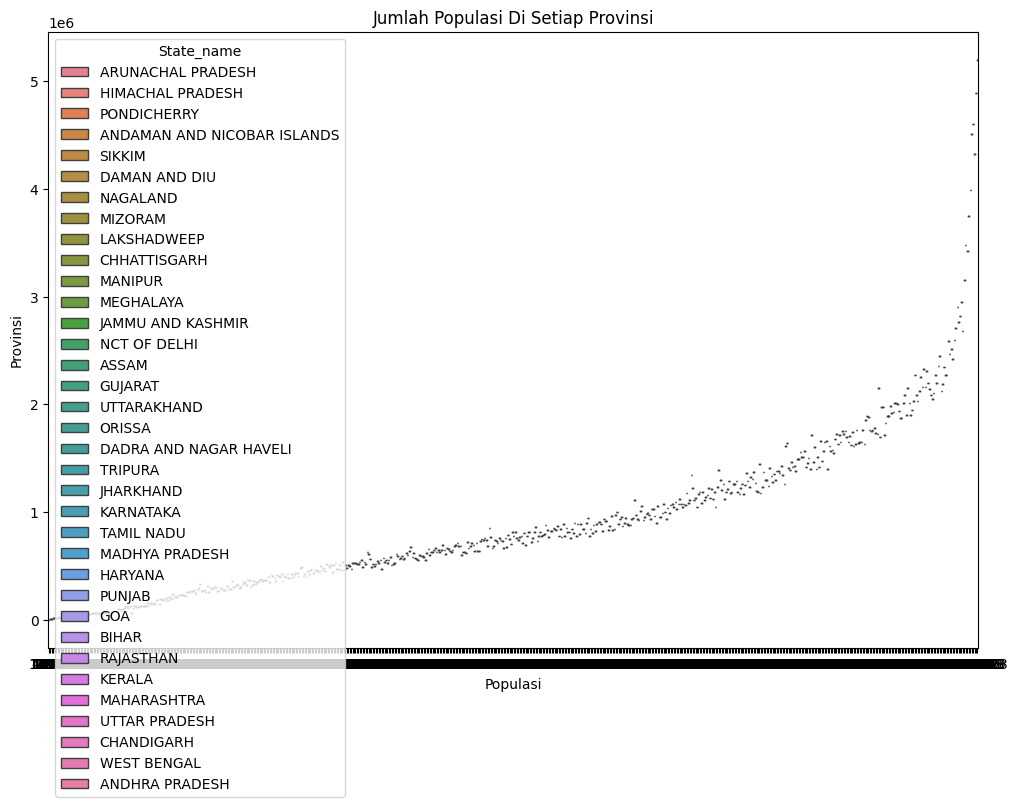

In [1506]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Male', y='Female', hue='State_name', data=data2)
plt.title('Jumlah Populasi Di Setiap Provinsi')
plt.xlabel('Populasi')
plt.ylabel('Provinsi')
plt.show()

In [1507]:
# Langkah 5

In [1508]:
!pip install sort_dataframeby_monthorweek
!pip install sorted-months-weekdays

In [1509]:
# Perbaikan: Menggunakan tanda kurung yang benar dan memperbaiki typo
data_pekerja_pria = data[(data['Population'] == 'Male_Workers') & (data['Higher_Education'] == 0)]
data_pekerja_wanita = data[(data['Population'] == 'Female_Workers') & (data['Higher_Education'] == 0)]

In [1510]:
# Perbaikan: Typo pada 'columns' dan konsistensi nama variabel
Pendidikan1 = data_pekerja_pria['Literate'].value_counts().reset_index()
Pendidikan1.columns = ['Literate_Status', 'Count']  # Nama kolom yang lebih sesuai

pendidikan2 = data_pekerja_wanita['Literate'].value_counts().reset_index()
pendidikan2.columns = ['Literate_Status', 'Count']  # Nama kolom yang lebih sesuai

In [1511]:
# Merge data pendidikan pria dan wanita
final_data = Pendidikan1.merge(pendidikan2, on='Literate_Status', suffixes=('_Pria', '_Wanita'))

import sort_dataframeby_monthorweek as sd

# Jika tidak, gunakan sorting biasa
final_data = final_data.sort_values('Literate_Status')

In [1512]:
final_data.head()

,Literate_Status,Count_Pria,Count_Wanita


In [1513]:
# Filter data pekerja pria dan wanita
data_pekerja_pria = data[data['Population'] == 'Male_Workers']
data_pekerja_wanita = data[data['Population'] == 'Female_Workers']

# Hitung berdasarkan kelompok usia
usia_pria = data_pekerja_pria[['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']].sum().reset_index()
usia_pria.columns = ['age_group', 'count_male_workers']

usia_wanita = data_pekerja_wanita[['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']].sum().reset_index()
usia_wanita.columns = ['age_group', 'count_female_workers']

# Gabungkan data
comparison_age_gender = usia_pria.merge(usia_wanita, on='age_group')
print(comparison_age_gender)

         age_group  count_male_workers  count_female_workers
0   Age_Group_0_29                   0                     0
1  Age_Group_30_49                   0                     0
2     Age_Group_50                   0                     0


In [1514]:
# Hitung total per kategori
total_comparison = pd.DataFrame({
    'category': ['Total_Workers', 'Cultivator', 'Agricultural', 'Household',
                 'Secondary_Edu', 'Higher_Edu', 'Graduate_Edu'],
    'male_count': [
        data[data['Population'] == 'Male_Workers']['Workers'].sum(),
        data['Cultivator_Workers'].sum(),
        data['Agricultural_Workers'].sum(),
        data['Household_Workers'].sum(),
        data['Secondary_Education'].sum(),
        data['Higher_Education'].sum(),
        data['Graduate_Education'].sum()
    ],
    'female_count': [
        data[data['Population'] == 'Female_Workers']['Workers'].sum(),
        data['Cultivator_Workers'].sum(),  # Adjust if you have gender-specific columns
        data['Agricultural_Workers'].sum(),
        data['Household_Workers'].sum(),
        data['Secondary_Education'].sum(),
        data['Higher_Education'].sum(),
        data['Graduate_Education'].sum()
    ]
})

# Hitung persentase
total_comparison['male_percentage'] = (total_comparison['male_count'] /
                                     (total_comparison['male_count'] + total_comparison['female_count'])) * 100
total_comparison['female_percentage'] = 100 - total_comparison['male_percentage']

print(total_comparison)

        category  male_count  female_count  male_percentage  female_percentage
0  Total_Workers           0             0              NaN                NaN
1     Cultivator   118808780     118808780             50.0               50.0
2   Agricultural   144352849     144352849             50.0               50.0
3      Household    18338168      18338168             50.0               50.0
4  Secondary_Edu   131266961     131266961             50.0               50.0
5     Higher_Edu    79471101      79471101             50.0               50.0
6   Graduate_Edu    69768429      69768429             50.0               50.0


In [1515]:
import plotly.express as px

In [1516]:
Jumlah_jk = data.groupby('State_name')[['Male', 'Female']].mean().reset_index()
px.line(data_frame=Jumlah_jk, x='State_name', y=['Male', 'Female'], title='Rata-rata Populasi Laki-laki dan Perempuan per Provinsi')

In [1517]:
# Langkah 6


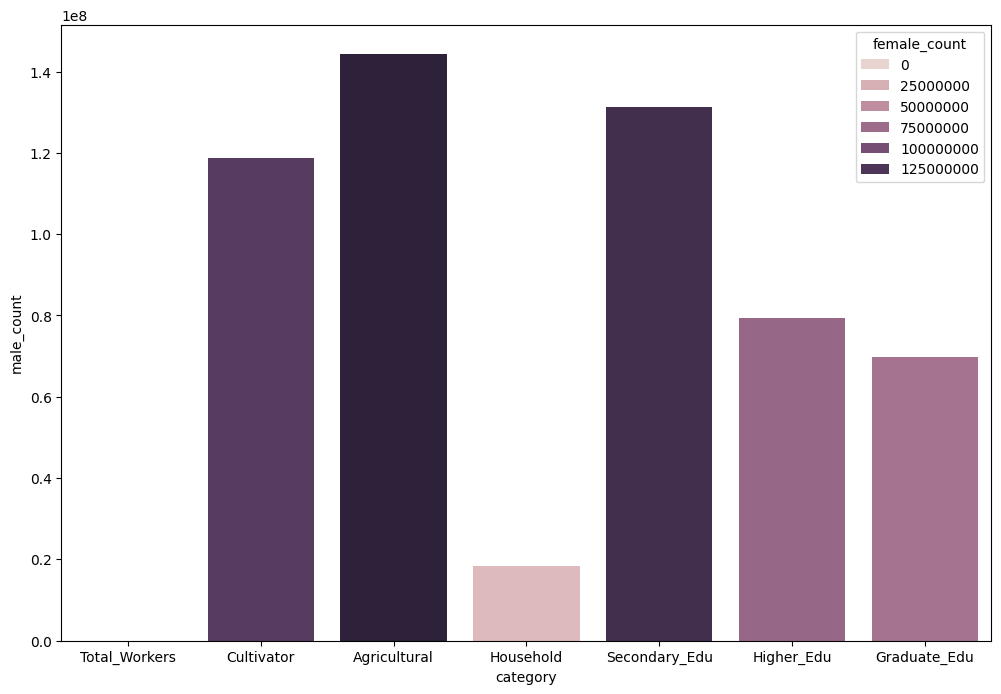

In [1518]:
plt.figure(figsize=(12,8))
sns.barplot(x='category', y='male_count', data=total_comparison, hue='female_count')
plt.xticks(rotation='horizontal')
plt.show()

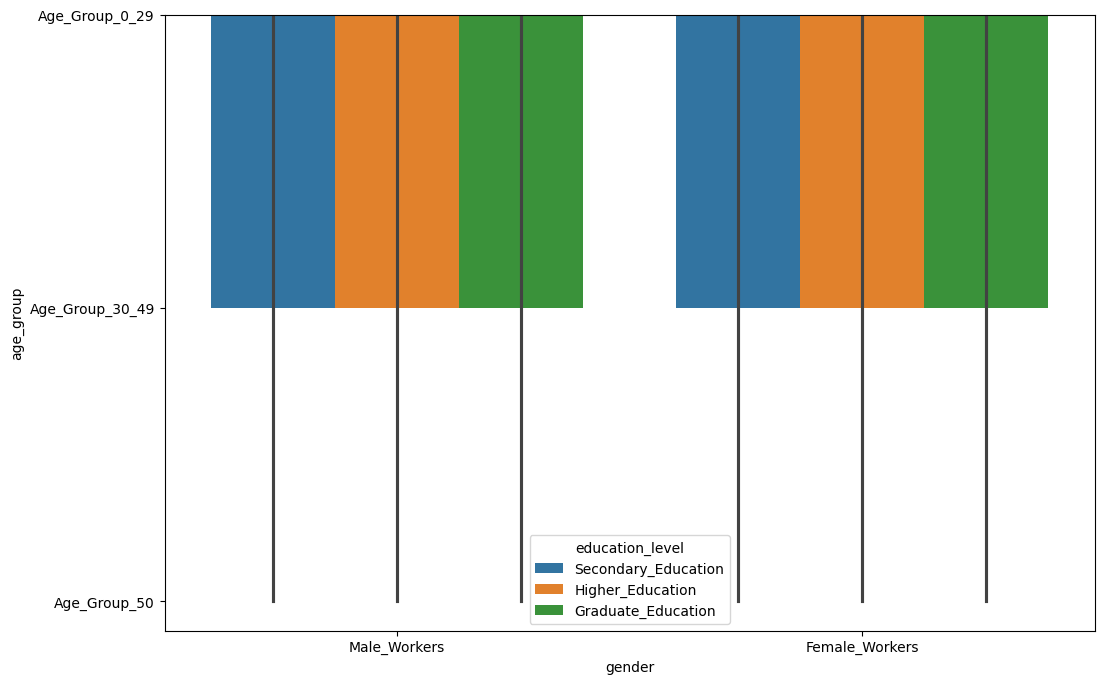

In [1519]:
plt.figure(figsize=(12,8))
sns.barplot(x='gender', y='age_group', data=comparison_df, hue='education_level')
plt.xticks(rotation='horizontal')
plt.show()

In [1520]:
# Langkah 7

In [1521]:
def education_level_function(row):
    if row['Secondary_Education'] > 0 and row['Higher_Education'] == 0 and row['Graduate_Education'] == 0:
        return 'secondary_only'
    elif row['Higher_Education'] > 0 and row['Secondary_Education'] > 0 and row['Graduate_Education'] == 0:
        return 'higher_education'
    elif row['Graduate_Education'] > 0:
        return 'graduate_education'
    elif row['Secondary_Education'] == 0 and row['Higher_Education'] == 0 and row['Graduate_Education'] == 0:
        return 'no_formal_education'
    else:
        return 'mixed_education'

data['education_category'] = data.apply(education_level_function, axis=1)

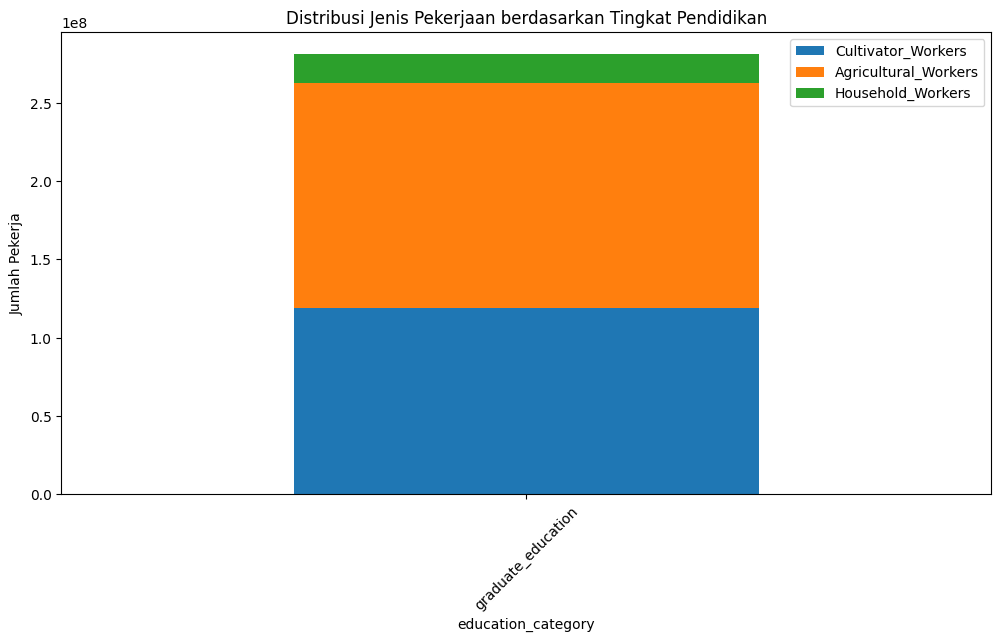

In [1522]:
# Analisis jenis pekerjaan berdasarkan pendidikan
occupation_edu_analysis = data.groupby(['education_category'])[
    ['Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers']
].sum().reset_index()

# Visualisasi
occupation_edu_analysis.set_index('education_category', inplace=True)
occupation_edu_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribusi Jenis Pekerjaan berdasarkan Tingkat Pendidikan')
plt.ylabel('Jumlah Pekerja')
plt.xticks(rotation=45)
plt.show()

In [1523]:
# Langkah 8

In [1524]:
data['dominant_worker_type'] = data.apply(lambda row:
    'cultivator' if row['Cultivator_Workers'] > row['Agricultural_Workers'] and row['Cultivator_Workers'] > row['Household_Workers'] else
    'agricultural' if row['Agricultural_Workers'] > row['Cultivator_Workers'] and row['Agricultural_Workers'] > row['Household_Workers'] else
    'household' if row['Household_Workers'] > row['Cultivator_Workers'] and row['Household_Workers'] > row['Agricultural_Workers'] else
    'mixed', axis=1)

In [1525]:
data

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,education_category,dominant_worker_type
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,66,39,74948,39709,21751,600759,178435,89679,graduate_education,agricultural
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,47,6,66459,41367,27950,503223,160933,88978,graduate_education,cultivator
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,88635,103,16265,8923,6197,70703,41515,21019,graduate_education,cultivator
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,20126,28,16938,9826,3077,87532,35561,17488,graduate_education,cultivator
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,83,10,46062,29517,13962,304979,109818,61334,graduate_education,cultivator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,...,21,14,8773,5711,4475,19760,12543,9428,graduate_education,agricultural
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,...,63,54,29456,15930,18998,102333,60089,37434,graduate_education,agricultural
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,...,119,0,6325,3668,1300,18786,12088,5922,graduate_education,household
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,38579,30612,7967,...,84,4,12707,10042,5133,57350,30741,17464,graduate_education,cultivator


In [1526]:
data.drop(columns=['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains'], axis=1, inplace=True)

In [1527]:
data

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Agricultural_Workers,Household_Workers,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,education_category,dominant_worker_type
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,56759,7946,74948,39709,21751,600759,178435,89679,graduate_education,agricultural
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,36630,29102,66459,41367,27950,503223,160933,88978,graduate_education,cultivator
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,1645,1020,16265,8923,6197,70703,41515,21019,graduate_education,cultivator
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,3763,1222,16938,9826,3077,87532,35561,17488,graduate_education,cultivator
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,31583,3930,46062,29517,13962,304979,109818,61334,graduate_education,cultivator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,...,82,69,8773,5711,4475,19760,12543,9428,graduate_education,agricultural
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,...,13077,1327,29456,15930,18998,102333,60089,37434,graduate_education,agricultural
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,...,242,2560,6325,3668,1300,18786,12088,5922,graduate_education,household
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,38579,30612,7967,...,1915,260,12707,10042,5133,57350,30741,17464,graduate_education,cultivator


In [1528]:
data.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50',
       'education_category', 'dominant_worker_type'],
      dtype='object')

In [1529]:
# Langkah 9

In [1530]:
# Identifikasi fitur kategorikal dan numerik
cate_features = [col for col in data.columns if data[col].dtype == 'object']
num_features = [col for col in data.columns if data[col].dtype != 'object']

print("Fitur Kategorikal:", cate_features)
print("Fitur Numerik:", num_features)

Fitur Kategorikal: ['State_name', 'District_name', 'education_category', 'dominant_worker_type']
Fitur Numerik: ['District_code', 'Population', 'Male', 'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers', 'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers', 'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']


In [1531]:
# Membuat DataFrame untuk fitur kategorikal
data_cat = data[cate_features]

data_cat['cancellation'] = (data['Population'] > data['Population'].median()).astype(int)

print("Data Kategorikal shape:", data_cat.shape)
print("Kolom data_cat:", data_cat.columns.tolist())

Data Kategorikal shape: (640, 5)
Kolom data_cat: ['State_name', 'District_name', 'education_category', 'dominant_worker_type', 'cancellation']


In [1532]:
# Mengambil semua kolom kecuali kolom target
cols = data_cat.columns
cols = cols[0:-1]  # Menghapus kolom terakhir ('cancellation')

print("Kolom untuk encoding:", cols.tolist())

Kolom untuk encoding: ['State_name', 'District_name', 'education_category', 'dominant_worker_type']


In [1533]:
# Melakukan target encoding untuk setiap fitur kategorikal
for col in cols:
    # Hitung rata-rata cancellation rate untuk setiap kategori
    dict2 = data_cat.groupby([col])['cancellation'].mean().to_dict()

    # Replace nilai kategorikal dengan nilai encoding
    data_cat[col] = data_cat[col].map(dict2)

    print(f"Encoding untuk {col}: {dict2}")

print("\nData setelah encoding:")
print(data_cat.head())

Encoding untuk State_name: {'ANDAMAN AND NICOBAR ISLANDS': 0.0, 'ANDHRA PRADESH': 1.0, 'ARUNACHAL PRADESH': 0.0, 'ASSAM': 0.18518518518518517, 'BIHAR': 0.8421052631578947, 'CHANDIGARH': 0.0, 'CHHATTISGARH': 0.2777777777777778, 'DADRA AND NAGAR HAVELI': 0.0, 'DAMAN AND DIU': 0.0, 'GOA': 0.0, 'GUJARAT': 0.6538461538461539, 'HARYANA': 0.14285714285714285, 'HIMACHAL PRADESH': 0.0, 'JAMMU AND KASHMIR': 0.0, 'JHARKHAND': 0.2916666666666667, 'KARNATAKA': 0.6, 'KERALA': 0.7142857142857143, 'LAKSHADWEEP': 0.0, 'MADHYA PRADESH': 0.36, 'MAHARASHTRA': 0.8, 'MANIPUR': 0.0, 'MEGHALAYA': 0.0, 'MIZORAM': 0.0, 'NAGALAND': 0.0, 'NCT OF DELHI': 0.6666666666666666, 'ORISSA': 0.36666666666666664, 'PONDICHERRY': 0.0, 'PUNJAB': 0.4, 'RAJASTHAN': 0.6060606060606061, 'SIKKIM': 0.0, 'TAMIL NADU': 0.71875, 'TRIPURA': 0.25, 'UTTAR PRADESH': 0.8873239436619719, 'UTTARAKHAND': 0.23076923076923078, 'WEST BENGAL': 1.0}
Encoding untuk District_name: {'Adilabad': 1.0, 'Agra': 1.0, 'Ahmadabad': 1.0, 'Ahmadnagar': 1.0, '

In [1534]:
# Langkah 10

In [1535]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)
dataframe.columns

Index(['State_name', 'District_name', 'education_category',
       'dominant_worker_type', 'cancellation', 'District_code', 'Population',
       'Male', 'Female', 'Literate', 'Workers', 'Male_Workers',
       'Female_Workers', 'Cultivator_Workers', 'Agricultural_Workers',
       'Household_Workers', 'Secondary_Education', 'Higher_Education',
       'Graduate_Education', 'Age_Group_0_29', 'Age_Group_30_49',
       'Age_Group_50'],
      dtype='object')

In [1536]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

<Axes: xlabel='Workers', ylabel='Density'>

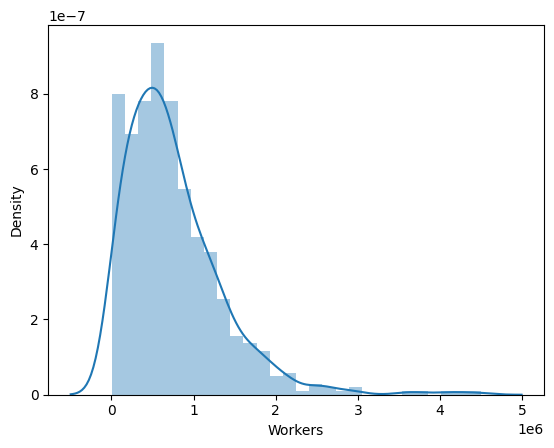

In [1537]:
sns.distplot(dataframe['Workers'])

In [1538]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

handle_outlier('Population')
handle_outlier('Literate')
handle_outlier('Male')
handle_outlier('Female')
handle_outlier('Workers')
handle_outlier('Graduate_Education')


In [1539]:
dataframe.dropna(inplace=True)

<Axes: xlabel='Workers', ylabel='Density'>

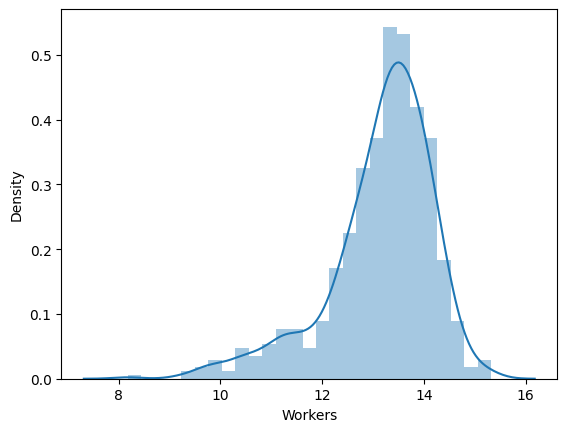

In [1540]:
sns.distplot(dataframe['Workers'])

<Axes: xlabel='Literate', ylabel='Density'>

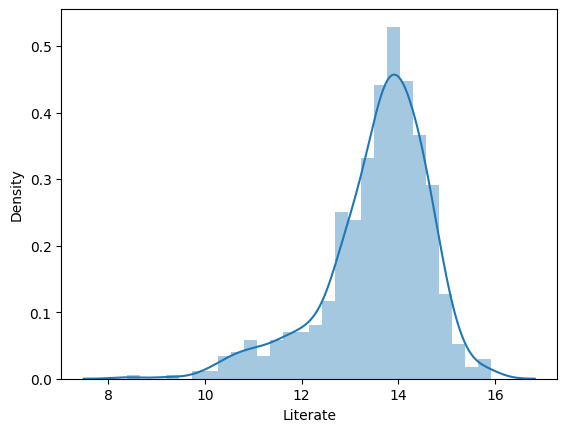

In [1541]:
sns.distplot(dataframe['Literate'])

In [1542]:
# Langkah 11 dan 12

In [1543]:
# Hapus fitur yang merupakan 'post-event information' di awal
# data.drop(['gender_dominance', 'dominant_age','dominant_worker_type'], axis=1, inplace=True)

In [1544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District_code         640 non-null    int64 
 1   State_name            640 non-null    object
 2   District_name         640 non-null    object
 3   Population            640 non-null    int64 
 4   Male                  640 non-null    int64 
 5   Female                640 non-null    int64 
 6   Literate              640 non-null    int64 
 7   Workers               640 non-null    int64 
 8   Male_Workers          640 non-null    int64 
 9   Female_Workers        640 non-null    int64 
 10  Cultivator_Workers    640 non-null    int64 
 11  Agricultural_Workers  640 non-null    int64 
 12  Household_Workers     640 non-null    int64 
 13  Secondary_Education   640 non-null    int64 
 14  Higher_Education      640 non-null    int64 
 15  Graduate_Education    640 non-null    in

Text(0.5, 1.02, 'Distribusi Workers berdasarkan Kategori Literate')

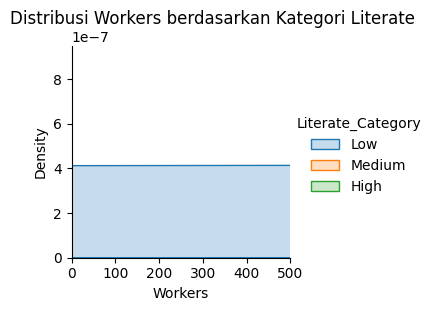

In [1545]:
# Jika 'Literate' numerik, buat kategori terlebih dahulu
data['Literate_Category'] = pd.cut(data['Literate'],
                                  bins=3,
                                  labels=['Low', 'Medium', 'High'])

sns.FacetGrid(data, hue='Literate_Category', xlim=(0,500))\
   .map(sns.kdeplot, 'Workers', shade=True)\
   .add_legend()\
   .set_axis_labels('Workers', 'Density')\
   .fig.suptitle('Distribusi Workers berdasarkan Kategori Literate', y=1.02)


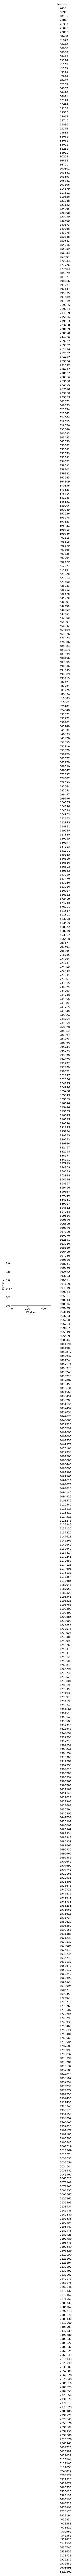

In [1546]:
sns.FacetGrid(data,hue='Literate',xlim=(0,500)).map(sns.kdeplot,'Workers',shade=True).add_legend()

In [1547]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State_name            640 non-null    float64
 1   District_name         640 non-null    float64
 2   education_category    640 non-null    float64
 3   dominant_worker_type  640 non-null    float64
 4   District_code         640 non-null    int64  
 5   Population            640 non-null    float64
 6   Male                  640 non-null    float64
 7   Female                640 non-null    float64
 8   Literate              640 non-null    float64
 9   Workers               640 non-null    float64
 10  Male_Workers          640 non-null    int64  
 11  Female_Workers        640 non-null    int64  
 12  Cultivator_Workers    640 non-null    int64  
 13  Agricultural_Workers  640 non-null    int64  
 14  Household_Workers     640 non-null    int64  
 15  Secondary_Education   6

In [1548]:
dataframe.drop(['education_category', 'District_code'], axis=1, inplace=True)

In [1549]:
corr = dataframe.corr()
corr['Population'].sort_values(ascending=False)

,Population
Population,1.000000
Male,0.999573
Female,0.999489
Workers,0.987310
Literate,0.986898
Graduate_Education,0.904420
Age_Group_0_29,0.807059
Age_Group_50,0.780573
Male_Workers,0.780373
Age_Group_30_49,0.771160


In [1550]:
corr

,State_name,District_name,dominant_worker_type,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
State_name,1.000000,0.651211,0.452813,0.734237,0.733287,0.734462,0.715081,0.724532,0.624673,0.579855,0.446511,0.636508,0.497534,0.496248,0.488591,0.651434,0.658164,0.614240,0.648939
District_name,0.651211,1.000000,0.327878,0.718564,0.719632,0.716602,0.712896,0.700522,0.678504,0.611412,0.501213,0.580327,0.487695,0.566553,0.567419,0.672566,0.715312,0.669241,0.688602
dominant_worker_type,0.452813,0.327878,1.000000,0.394626,0.390149,0.398915,0.393761,0.395807,0.321125,0.319813,-0.084337,0.486860,0.266963,0.279527,0.273798,0.375600,0.304523,0.338209,0.350398
Population,0.734237,0.718564,0.394626,1.000000,0.999573,0.999489,0.986898,0.987310,0.780373,0.705130,0.574688,0.635658,0.542473,0.649592,0.650195,0.904420,0.807059,0.771160,0.780573
Male,0.733287,0.719632,0.390149,0.999573,1.000000,0.998133,0.985928,0.985691,0.782159,0.700353,0.574730,0.632846,0.542874,0.648823,0.650919,0.903801,0.810065,0.771696,0.778987
Female,0.734462,0.716602,0.398915,0.999489,0.998133,1.000000,0.986895,0.988056,0.777564,0.709481,0.574261,0.638109,0.541468,0.649445,0.648513,0.904022,0.802982,0.769660,0.781273
Literate,0.715081,0.712896,0.393761,0.986898,0.985928,0.986895,1.000000,0.974748,0.788897,0.695661,0.531093,0.595163,0.540328,0.699107,0.696953,0.944468,0.794310,0.787671,0.803416
Workers,0.724532,0.700522,0.395807,0.987310,0.985691,0.988056,0.974748,1.000000,0.777703,0.762417,0.608968,0.661493,0.531331,0.644200,0.640780,0.890116,0.785743,0.767483,0.779308
Male_Workers,0.624673,0.678504,0.321125,0.780373,0.782159,0.777564,0.788897,0.777703,1.000000,0.813297,0.526771,0.637827,0.684897,0.877661,0.868655,0.751837,0.965454,0.994594,0.967777
Female_Workers,0.579855,0.611412,0.319813,0.705130,0.700353,0.709481,0.695661,0.762417,0.813297,1.000000,0.702070,0.760673,0.545783,0.701633,0.687641,0.646922,0.776398,0.805663,0.817032


In [1551]:
corr['Population'].sort_values(ascending=False)

,Population
Population,1.000000
Male,0.999573
Female,0.999489
Workers,0.987310
Literate,0.986898
Graduate_Education,0.904420
Age_Group_0_29,0.807059
Age_Group_50,0.780573
Male_Workers,0.780373
Age_Group_30_49,0.771160


In [1552]:
corr['Workers'].sort_values(ascending=False).index

Index(['Workers', 'Female', 'Population', 'Male', 'Literate',
       'Graduate_Education', 'Age_Group_0_29', 'Age_Group_50', 'Male_Workers',
       'Age_Group_30_49', 'Female_Workers', 'State_name', 'District_name',
       'Agricultural_Workers', 'Secondary_Education', 'Higher_Education',
       'Cultivator_Workers', 'Household_Workers', 'dominant_worker_type'],
      dtype='object')

In [1553]:
dataframe.drop(['dominant_worker_type'],axis=1,inplace=True)

In [1554]:
dataframe.shape

(640, 18)

In [1555]:
dataframe.dropna(inplace=True)

In [1556]:
x=dataframe.drop('Workers',axis=1)

In [1557]:
y=dataframe['Workers']

In [1558]:
x.columns

Index(['State_name', 'District_name', 'Population', 'Male', 'Female',
       'Literate', 'Male_Workers', 'Female_Workers', 'Cultivator_Workers',
       'Agricultural_Workers', 'Household_Workers', 'Secondary_Education',
       'Higher_Education', 'Graduate_Education', 'Age_Group_0_29',
       'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [1559]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005))
feature_sel_model.fit(x, y)

cols=x.columns
selected_feat = cols[feature_sel_model.get_support()]
selected_feat

Index(['Population', 'Female', 'Literate'], dtype='object')

In [1560]:
x = x[selected_feat]
x.columns

Index(['Population', 'Female', 'Literate'], dtype='object')

In [1561]:
# Langkah 13

In [1562]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)
X_train.shape

(480, 3)

In [1563]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd


bins = dataframe['Workers'].quantile([0, 0.3, 0.7, 1]).tolist()
labels = ['Low_Workers', 'Medium_Workers', 'High_Workers']


unique_bins = sorted(list(set(bins)))
if len(unique_bins) - 1 != len(labels):
    print(f"Warning: Number of unique bins ({len(unique_bins)}) does not match number of labels ({len(labels)}). Adjusting labels.")
    labels = [f'Workers_Bin_{i}' for i in range(len(unique_bins)-1)]


dataframe['Workers_Category'] = pd.cut(dataframe['Workers'], bins=unique_bins, labels=labels, include_lowest=True)

dataframe.dropna(subset=['Workers_Category'], inplace=True)

# Redefine x and y with the new categorical target
x = dataframe.drop(['Workers', 'Workers_Category'], axis=1)
y = dataframe['Workers_Category']

# Apply one-hot encoding to categorical features in x
x = pd.get_dummies(x, columns=['State_name', 'District_name', 'Population'])


# Split the data again
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # Added random_state for reproducibility


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f"Akurasi yang Benar: {accuracy}")
conf_matr = confusion_matrix(y_test, pred)
print(f"Confusion Matrix yang Benar: {conf_matr}")

Akurasi yang Benar: 0.875
Confusion Matrix yang Benar: [[46  0  6]
 [ 0 48 11]
 [ 2  1 46]]


In [1564]:
# Langkah 14

In [1565]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg, x, y, cv=10)
score.mean()

np.float64(0.83125)

In [1566]:
# Langkah 15

In [1567]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('Regresion',LogisticRegression(max_iter=1000)))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

for name,model in models:
    print(name)
    model.fit(X_train,y_train)

    predictions=model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)

    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

Regresion
[[46  0  2]
 [ 0 48  1]
 [ 6 11 46]]
0.875


Naive_bayes
[[48  0  2]
 [ 0 51  1]
 [ 4  8 46]]
0.90625


Random Forest
[[51  0  1]
 [ 0 52  1]
 [ 1  7 47]]
0.9375


Decision_tree
[[49  0  0]
 [ 0 53  1]
 [ 3  6 48]]
0.9375


KNN
[[48  0  2]
 [ 0 54  0]
 [ 4  5 47]]
0.93125


